<h1><center>Analyse de l'Enquête sur la Qualité de Vie au Travail</center></h1>
    <p>Ce notebook d'analyse est dédié à l'exploration des données issues d'une enquête menée en juin 2015 par le service des Ressources Humaines. L'objectif de cette enquête était d'obtenir des retours des employés concernant leur qualité de vie au travail. Chaque employé avait la possibilité de répondre à un questionnaire sur son lieu de travail, en collaboration avec les responsables hiérarchiques, sans obligation de participation.</p>
    <h3>Enquête Qualité de Vie au Travail</h3>
    <p>L'enquête portait sur trois aspects essentiels de la vie professionnelle des employés, mesurés à l'aide de notations spécifiques :</p>
    <ol>
        <li><strong>Environnement de travail (EnvironmentSatisfaction) :</strong> Notation de 1 ("Faible") à 4 ("Très élevé").</li>
        <li><strong>Travail effectué (JobSatisfaction) :</strong> Notation de 1 à 4, représentant différents niveaux de satisfaction.</li>
        <li><strong>Équilibre entre vie professionnelle et vie privée (WorkLifeBalance) :</strong> Notation de 1 ("Mauvais") à 4 ("Excellent").</li>
    </ol>
    <p>Lorsqu'un employé n'a pas répondu à une question, le texte "NA" est indiqué à la place de la note.</p>
    <h3>Données disponibles</h3>
    <p>Les données utilisées dans cette analyse proviennent du fichier "employee_survey_data.csv". Le notebook s'articulera autour de différentes étapes, de l'exploration initiale des données à la création de nouvelles variables, en passant par la gestion des données manquantes et la visualisation des résultats.</p>


### **Partie 1: Importation des bibliothèques et chargement des données**

In [2]:
import pandas as pd
import numpy as np
from work_tools import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
employee_survey = pd.read_csv('./employee_survey_data.csv')

#### Exploration initiale des données

In [4]:
# Afficher les 10 premières lignes du DataFrame
employee_survey.head(10)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
5,6,3.0,2.0,2.0
6,7,1.0,3.0,1.0
7,8,1.0,2.0,3.0
8,9,2.0,4.0,3.0
9,10,2.0,1.0,3.0


In [5]:
# Afficher la forme du DataFrame (nombre de lignes et de colonnes)
employee_survey.shape

(4410, 4)

=> L'ensemble de données de l'enquête sur la qualité de vie au travail compte 4410 réponses d'employés, chacune évaluant 4 aspects différents.

In [6]:
# Afficher des informations sur les colonnes et les types de données
employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


=> Le DataFrame représente les réponses de 4410 employés à une enquête sur la qualité de vie au travail. Il contient des colonnes telles que l'identifiant de l'employé (EmployeeID) et les niveaux de satisfaction liés à l'environnement de travail, au travail effectué, et à l'équilibre vie professionnelle-vie privée. Certaines colonnes ont des valeurs manquantes. Le DataFrame occupe 137.9 KB en mémoire.

In [7]:
# Afficher des statistiques descriptives pour chaque colonne
employee_survey.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
EnvironmentSatisfaction,4385.0,2.723603,1.092756,1.0,2.00,3.0,4.00,4.0
JobSatisfaction,4390.0,2.728246,1.101253,1.0,2.00,3.0,4.00,4.0
WorkLifeBalance,4372.0,2.761436,0.706245,1.0,2.00,3.0,3.00,4.0


=> Ces statistiques résument les tendances centrales, la dispersion et la distribution des réponses des employés dans l'enquête.

### **Partie 2: Gestion des données manquantes**

In [8]:
# Vérifier le nombre de valeurs manquantes par colonne
employee_survey.isna().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

   <p>Le résultat <code>employee_survey.isna().sum()</code> indique le nombre de valeurs manquantes (NA) pour chaque variable du DataFrame. En résumé :</p>
    <ul>
        <li><strong>EnvironmentSatisfaction :</strong> 25 réponses manquantes.</li>
        <li><strong>JobSatisfaction :</strong> 20 réponses manquantes.</li>
        <li><strong>WorkLifeBalance :</strong> 38 réponses manquantes.</li>
    </ul>
    <p>Ces valeurs manquantes nécessitent une attention particulière lors de l'analyse, et des stratégies appropriées pourraient être envisagées, telles que l'imputation des données manquantes, pour assurer la cohérence de l'analyse.</p>


In [9]:
# Vérifier s'il y a des doublons dans le DataFrame
check_for_duplicates(employee_survey)

Empty DataFrame
Columns: [EmployeeID, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance]
Index: []
Number of duplicates: 0
The DataFrame does not contain duplicates.


<p>Le DataFrame est exempt de doublons, indiquant une qualité de données initiale sans duplicatas.</p>
    <h5><strong>En cas de Présence de Doublons :</strong></h5>
    <ol>
        <li><strong>Identification :</strong> Utilisez la fonction <code>duplicated()</code> pour repérer les doublons.</li>
        <li><strong>Suppression :</strong> Utilisez <code>drop_duplicates()</code> pour éliminer les doublons, en veillant à conserver une copie originale si nécessaire.</li>
        <li><strong>Vérification :</strong> Confirmez l'absence de doublons avec une nouvelle vérification.</li>
        <li><strong>Gestion des Manquants :</strong> Assurez-vous que la suppression de doublons n'a pas introduit de problèmes de données manquantes. Imputez si nécessaire.</li>
        <li><strong>Analyse Approfondie :</strong> Explorez les raisons des doublons pour identifier et résoudre les problèmes sous-jacents. L'objectif est de garantir des données propres et fiables pour une analyse précise.</li>
    </ol>

In [10]:
# Remplir les valeurs manquantes dans le DataFrame
employee_survey = fill_missing_values(employee_survey)

In [11]:
# Vérifier à nouveau le nombre de valeurs manquantes après le remplissage
employee_survey.isna().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

<strong>Résumé du Remplissage des Valeurs Manquantes dans le DataFrame</strong>
    <p>Après avoir rempli les valeurs manquantes dans le DataFrame <code>employee_survey</code>, toutes les colonnes, y compris <code>EmployeeID</code>, <code>EnvironmentSatisfaction</code>, <code>JobSatisfaction</code>, et <code>WorkLifeBalance</code>, ne contiennent plus de données manquantes. Chaque colonne affiche un compte de zéro valeurs manquantes (0), indiquant la réussite du processus de remplissage. Le DataFrame est maintenant prêt pour une analyse approfondie.</p>

### **Partie 3: Visualisation des données**

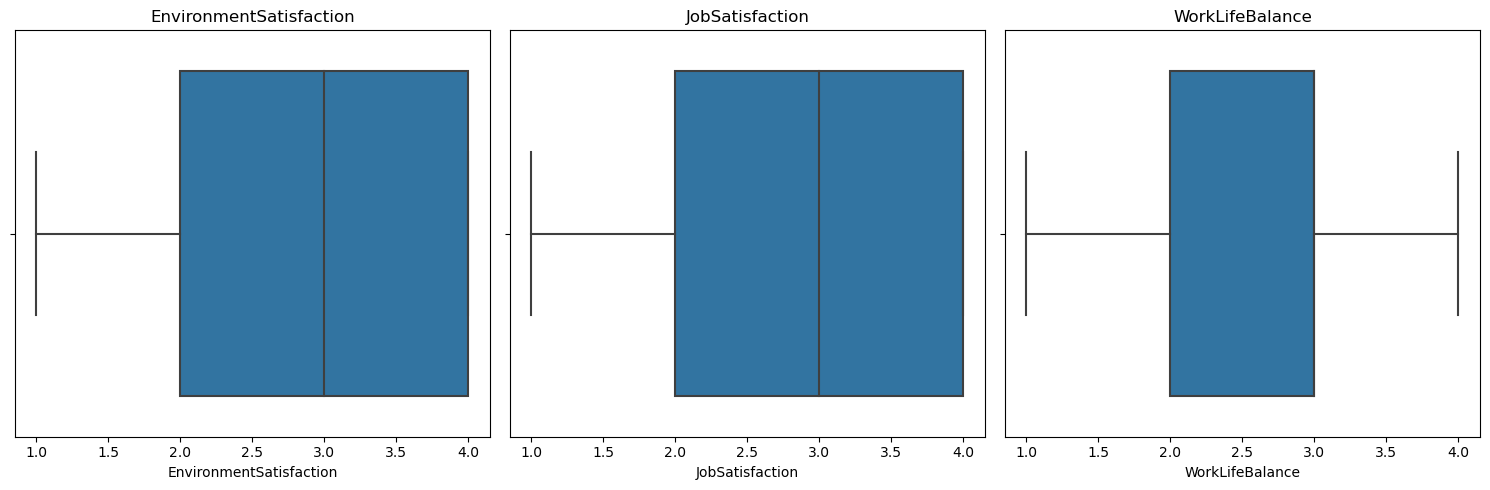

In [12]:
# Visualiser les valeurs aberrantes dans les colonnes numériques
visualize_outliers(employee_survey.iloc[:,1:])

Aucune valeur aberrante n'a été identifiée dans les colonnes numériques du DataFrame <code>employee_survey</code>, confirmant la stabilité des données dans ces dimensions spécifiques.  


#### **z_score**
<p>La fonction z_score, fréquemment utilisée en statistique, calcule le score z (ou z-score) d'une observation dans une distribution. Le z-score mesure le nombre d'écarts-types par lesquels une observation est éloignée de la moyenne de la distribution.</p>
    <ul>
        <li><strong>Calcul du Z-Score :</strong> Le z-score est calculé avec la formule : \( Z = \frac{(x - \mu)}{\sigma} \).</li>
        <li><strong>Interprétation :</strong> Un z-score positif indique une position au-dessus de la moyenne, et un z-score négatif indique une position en dessous.</li>
        <li><strong>Normalisation :</strong> Le z-score normalise les données, facilitant la comparaison entre différentes distributions.</li>
        <li><strong>Seuil de Valeurs Aberrantes :</strong> Un seuil commun est \( |Z| > 3 \) pour détecter les valeurs aberrantes.</li>
        <li><strong>Applications :</strong> Utilisé en statistique, analyse des données, et recherche scientifique pour évaluer la position d'une observation.</li>
    </ul>
    <p>En résumé, la fonction z_score est un outil essentiel pour évaluer la position d'une observation dans une distribution, facilitant la détection de valeurs aberrantes et la comparaison entre différentes distributions.</p>


In [13]:
# Appliquer le test des z-scores pour détecter les valeurs aberrantes
for col in employee_survey[1:]:
    z_scores(employee_survey,col)

Potential Outliers in EmployeeID: 0
Series([], Name: EmployeeID, dtype: int64)
Potential Outliers in EnvironmentSatisfaction: 0
Series([], Name: EnvironmentSatisfaction, dtype: float64)
Potential Outliers in JobSatisfaction: 0
Series([], Name: JobSatisfaction, dtype: float64)
Potential Outliers in WorkLifeBalance: 0
Series([], Name: WorkLifeBalance, dtype: float64)


<p>Aucune valeur aberrante n'a été détectée dans les colonnes numériques du DataFrame <code>employee_survey</code> après l'application du test des z-scores. Les données dans les colonnes telles que <code>EmployeeID</code>, <code>EnvironmentSatisfaction</code>, <code>JobSatisfaction</code>, et <code>WorkLifeBalance</code> se situent toutes dans des plages normales par rapport à leurs moyennes et écart-types respectifs. Ainsi, aucune intervention immédiate n'est nécessaire, et les données sont considérées comme exemptes de valeurs aberrantes selon ce test.</p>


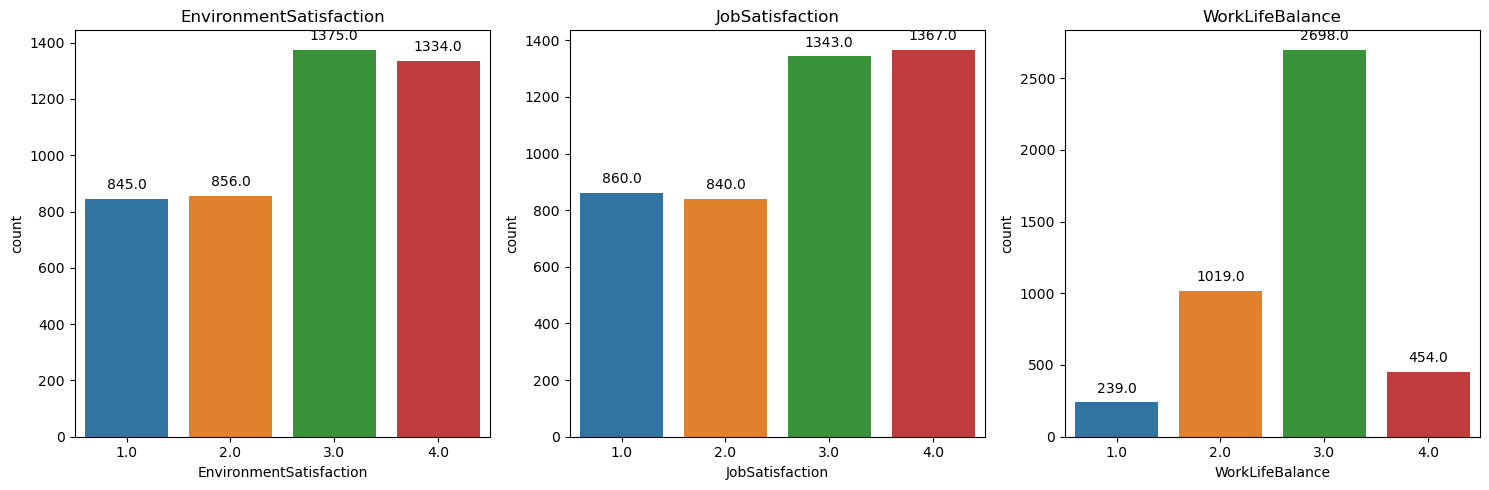

In [14]:
# Visualiser la fréquence des valeurs pour chaque colonne
visualize_frequency(employee_survey,employee_survey.columns[1:])

La visualisation de la fréquence des réponses dans les colonnes <code>"EnvironmentSatisfaction"</code>, <code>"JobSatisfaction"</code>, et <code>"WorkLifeBalance"</code> du DataFrame <code>employee_survey</code> offre une vue d'ensemble concise de la répartition des évaluations des employés dans ces aspects clés. Ces informations fournissent une compréhension rapide de la tendance générale de satisfaction des employés sans entrer dans les détails spécifiques des chiffres, facilitant ainsi une évaluation globale de ces aspects cruciaux de la vie professionnelle.

### **Partie 4: Création de nouvelles variables**

In [15]:
# Créer une nouvelle variable moyenne à partir des colonnes numériques
employee_survey = create_average_variable(employee_survey,employee_survey.columns[1:],'tauxSatisfactionGlobal')
employee_survey

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,tauxSatisfactionGlobal
0,1,3.0,4.0,2.0,3.00
1,2,3.0,2.0,4.0,3.00
2,3,2.0,2.0,1.0,1.67
3,4,4.0,4.0,3.0,3.67
4,5,4.0,1.0,3.0,2.67
...,...,...,...,...,...
4405,4406,4.0,1.0,3.0,2.67
4406,4407,4.0,4.0,3.0,3.67
4407,4408,1.0,3.0,3.0,2.33
4408,4409,4.0,1.0,3.0,2.67


La colonne <code>tauxSatisfactionGloba</code> est ajoutée en calculant la moyenne des évaluations dans les colonnes numériques du DataFrame employee_survey. Cette nouvelle variable représente une mesure consolidée de la satisfaction globale des employés, synthétisant les évaluations de différents aspects de leur expérience professionnelle. Son introduction simplifie l'analyse en fournissant un indicateur global, facilitant la compréhension rapide de la satisfaction générale au sein de l'organisation.

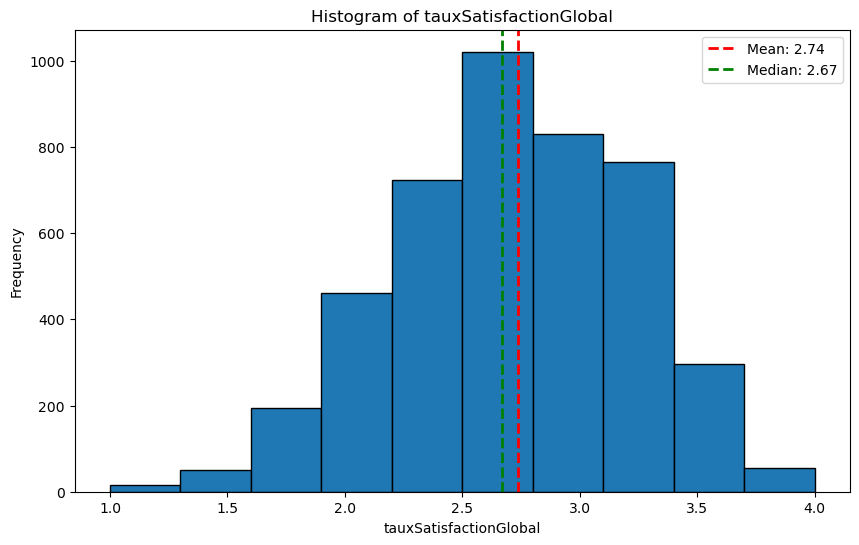

In [16]:
# Créer un histogramme annoté pour la nouvelle variable
create_annotated_histogram(employee_survey,employee_survey.columns[-1])

L'histogramme annoté de <code>tauxSatisfactionGlobal</code> dans le DataFrame employee_survey offre une représentation visuelle de la répartition des taux de satisfaction des employés, où chaque barre représente la fréquence d'occurrence des évaluations. **La moyenne (2.74)** et **la médiane (2.67)** fournissent des repères sur la tendance centrale, simplifiant l'évaluation rapide de la satisfaction globale au sein de l'organisation.

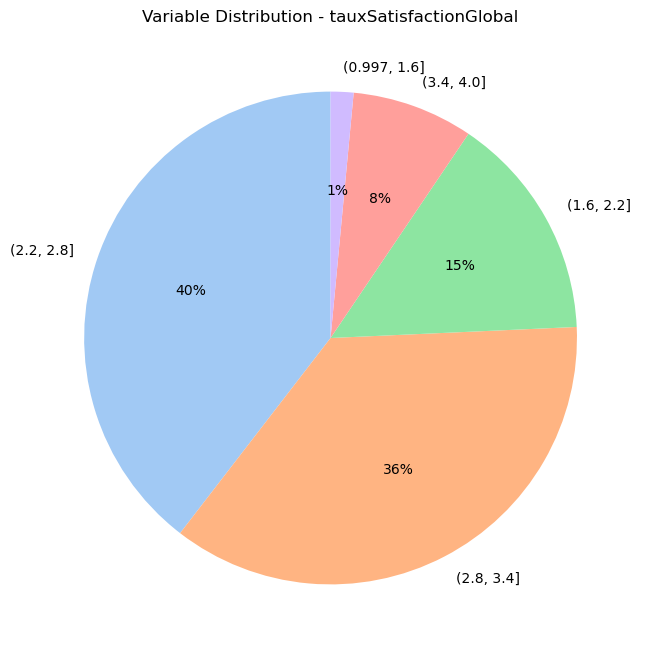

In [17]:
# Visualiser la répartition de la nouvelle variable avec un graphique en secteurs
visualize_variable_pie(employee_survey,employee_survey.columns[-1])

### **Partie 5: Sauvegarde des données traitées**

In [18]:
# Sélectionner les colonnes nécessaires pour la sauvegarde
data = employee_survey.drop(employee_survey.columns[1:-1],axis=1)
data

,EmployeeID,tauxSatisfactionGlobal
0,1,3.00
1,2,3.00
2,3,1.67
3,4,3.67
4,5,2.67
...,...,...
4405,4406,2.67
4406,4407,3.67
4407,4408,2.33
4408,4409,2.67


In [19]:
# Sauvegarder le DataFrame traité dans un nouveau fichier CSV
data.to_csv('./new_employee_survey.csv', index=False)

### **Conclusion**
<p>La décision de se concentrer exclusivement sur la colonne <code>tauxSatisfactionGlobal</code> lors de la création de la DataFrame "data" reflète une intention délibérée de mettre en avant cette variable pour des analyses spécifiques. La suppression des autres colonnes vise à simplifier les données, facilitant leur utilisation dans des analyses ou agrégations ultérieures. En orientant cette approche autour de la colonne <code>EmployeeID</code>, on facilite l'intégration efficace de ces données spécifiques.</p>
